# Explore here

In [30]:
# Your code here
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc


In [18]:
import joblib

# Lectura de datos preprocesados

In [2]:
X=pd.read_csv('/workspaces/Proyecto-de-Random-Forest/data/processed/X.csv')
y=pd.read_csv('/workspaces/Proyecto-de-Random-Forest/data/processed/y.csv')

In [4]:
X.shape

(1000, 6)

In [5]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
29,5,117,0,34.100000,0.337000,38
535,4,132,0,32.900000,0.302000,23
695,7,142,480,30.400000,0.128000,43
557,8,110,0,27.800000,0.237000,58
836,4,122,0,32.020995,0.256373,35


# Modelo Random Forest

In [9]:
# Creamos modelo

model = RandomForestClassifier(max_depth=5, min_samples_split=10, random_state = 42)
model.fit(X_train, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=5, min_samples_split=10, random_state=42)

In [14]:
# Prediccion del modelo

y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1])

In [35]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
predicciones_exactas = accuracy_score(y_test, y_pred, normalize=False)
print("Predicciones exactas: ", predicciones_exactas) 

Accuracy Score: 0.795
Predicciones exactas:  159.0


In [16]:
# validacion cruzada

scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')

print("Scores:", scores)
print("Mean score:", round(scores.mean(),4))
print("Standard deviation:", round(scores.std(),4))

/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

Scores: [0.7625 0.7375 0.8625 0.8375 0.7625 0.825  0.7625 0.775  0.8    0.8125]
Mean score: 0.7938
Standard deviation: 0.038


In [17]:
params = model.get_params()
print(params)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


# Optimización de Hiperparámetros

RandomizedSearchCV

In [19]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [10, 50, 100, 200,300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15,20],
    'min_samples_split': np.random.randint(2,20,size=10),
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'warm_start':[True]    
}

# Crear un objeto RandomizedSearchCV
model_rs = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_grid, cv=10, scoring='accuracy', n_iter=40, verbose=1)
model_rs.fit(X_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=40,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': array([15, 19,  5, 17, 12, 11, 11, 18, 12,  9]),
                                        'n_estimators': [10, 50, 100, 200, 300],
                                        'warm_start': [True]},
                   scoring='accuracy', verbose=1)

In [20]:
print("Mejor puntuación:", model_rs.best_score_)
print("Mejores hiperparámetros:", model_rs.best_params_)

Mejor puntuación: 0.80375
Mejores hiperparámetros: {'warm_start': True, 'n_estimators': 10, 'min_samples_split': np.int64(12), 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'gini'}


In [21]:
model_rs_final=RandomForestClassifier(n_estimators=10, warm_start= True, criterion='gini', max_depth=5, min_samples_split=12,
    min_samples_leaf=10, max_features='sqrt',random_state=42)
model_rs_final.fit(X_train, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=12,
                       n_estimators=10, random_state=42, warm_start=True)

In [22]:
y_pred_rs = model_rs_final.predict(X_test)
y_pred_rs

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1])

In [34]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rs)}")
predicciones_exactas = accuracy_score(y_test, y_pred_rs, normalize=False)
print("Predicciones exactas: ", predicciones_exactas) 

Accuracy Score: 0.75
Predicciones exactas:  150.0


GridSearchCV

In [24]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 150],
    'criterion': ['entropy'],
    'max_depth': [5, 10, 12],
    'min_samples_split':[10,12,15],
    'min_samples_leaf': [1,2],
    'max_features': [3],
    'random_state': [42]
}
    
# Crear un objeto GridSearchCV
model_gs = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=1)

# Entrenar el modelo con los datos de entrenamiento
model_gs.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['entropy'], 'max_depth': [5, 10, 12],
                         'max_features': [3], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [10, 12, 15],
                         'n_estimators': [50, 100, 150], 'random_state': [42]},
             scoring='accuracy', verbose=1)

In [25]:
print("Mejor puntuación:", model_gs.best_score_)
print("Mejores hiperparámetros:", model_gs.best_params_)

Mejor puntuación: 0.8025
Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50, 'random_state': 42}


In [26]:
model_gs_final=RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=5, min_samples_split=10,
    min_samples_leaf=2, max_features=3,random_state=42)
model_gs_final.fit(X_train, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', max_depth=5, max_features=3,
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=50, random_state=42)

In [27]:
y_pred_gs = model_gs_final.predict(X_test)
y_pred_gs

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1])

In [33]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_gs)}")
predicciones_exactas = accuracy_score(y_test, y_pred_gs, normalize=False)
print("Predicciones exactas: ", predicciones_exactas) 

Accuracy Score: 0.78
Predicciones exactas:  156.0


Gráfica para analizar modelo

In [31]:
# Curva ROC
y_pred_proba=model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_value = auc(fpr, tpr)

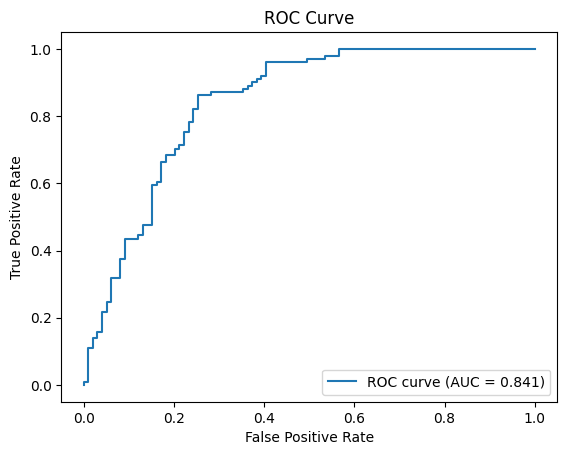

In [32]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.3f})'.format(auc_value))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Conclusiones
* Inicialmente el modelo arrojo:
    -  Accuracy Score: 0.795
    - Predicciones exactas:  159.0
* Posteriormente se realizo RandomSearch y arrojo:
    - Accuracy Score: 0.75
    - Predicciones exactas:  150.0
* Por ultimo se reealizo un GridSearch y arrojo:
    - Accuracy Score: 0.78
    - Predicciones exactas:  156.0
* El accuracy alcanzado es de 0.78, lo que nos indica que el modelo logra clasificar correctamente casi el 80%.

# Guardado del modelo

In [38]:
model_path = '/workspaces/Proyecto-de-Random-Forest/models/model_ramdomforest_diabetes.joblib'
# Save the model
joblib.dump(model_gs_final, model_path)

print(f"Modelo guardado en {model_path}")

Modelo guardado en /workspaces/Proyecto-de-Random-Forest/models/model_ramdomforest_diabetes.joblib
